In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline
from scipy.stats import norm

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [5]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [7]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [8]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [9]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [10]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [11]:
#df.corr()['GAS'].sort_values()

In [12]:
#df.corr()['WATER'].sort_values()

In [13]:
df.corr()

,OIL
OIL,1.0


In [14]:
from datetime import datetime
import statsmodels.api as sm

In [15]:
#df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [16]:
#df['START_DATE']=df['START_DATE'].apply(pd.to_datetime)

In [17]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [19]:
df.set_index('START_DATE',inplace=True)

In [20]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [21]:
df['OIL']

START_DATE
1974-01-01     7134368
1974-01-02     9528303
1974-01-03    12263786
1974-01-04    13153821
1974-01-05    12240857
                ...   
2017-01-08     8450763
2017-01-09     8168717
2017-01-10     8668929
2017-01-11     8452498
2017-01-12     8607196
Name: OIL, Length: 528, dtype: int64

In [22]:
#df = df.drop('WATER',axis=1)

In [23]:
#df = df.drop('UWI',axis=1)

In [24]:
#df = df.drop('GAS',axis=1)

In [25]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [26]:
df['OIL']

START_DATE
1974-01-01     7134368
1974-01-02     9528303
1974-01-03    12263786
1974-01-04    13153821
1974-01-05    12240857
                ...   
2017-01-08     8450763
2017-01-09     8168717
2017-01-10     8668929
2017-01-11     8452498
2017-01-12     8607196
Name: OIL, Length: 528, dtype: int64

In [27]:
from scipy import stats

In [28]:
#df=df.replace(0, np.nan)

In [29]:
#df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 1974-01-01 to 2017-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   OIL     528 non-null    int64
dtypes: int64(1)
memory usage: 28.2+ KB


In [31]:
df['OIL']

START_DATE
1974-01-01     7134368
1974-01-02     9528303
1974-01-03    12263786
1974-01-04    13153821
1974-01-05    12240857
                ...   
2017-01-08     8450763
2017-01-09     8168717
2017-01-10     8668929
2017-01-11     8452498
2017-01-12     8607196
Name: OIL, Length: 528, dtype: int64

In [32]:
#OilRate=df['OIL']
#OilRate

In [33]:
#df[['START_DATE','UWI','OIL']].sort_values('OIL',ascending = True).groupby(by='UWI').sum().tail(20)
#dfx=df[['UWI','OIL']].sort_values('OIL',ascending = True).groupby(by='OIL').sum().tail(20)
#dfx

In [34]:
#df
#dfy=df[['START_DATE','OIL']].sort_values('OIL',ascending = True).groupby(by='OIL').sum().tail(20)
#dfy

In [35]:
df.isnull().sum()

OIL    0
dtype: int64

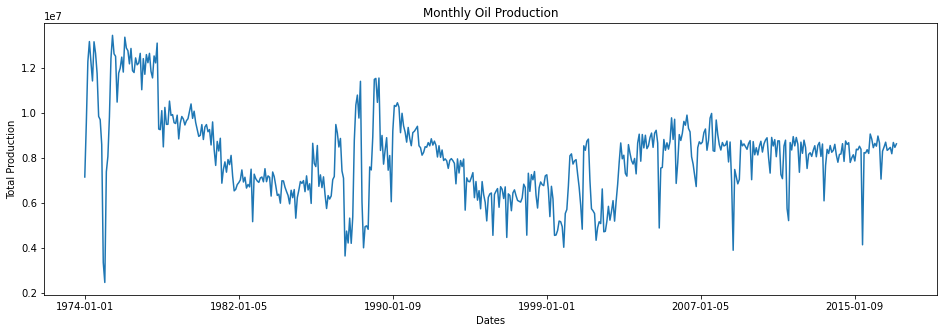

In [36]:
df.index.freq = 'MS'
ax = df['OIL'].plot(figsize = (16,5), title = "Monthly Oil Production")
ax.set(xlabel='Dates', ylabel='Total Production');

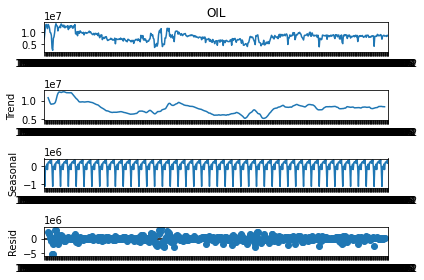

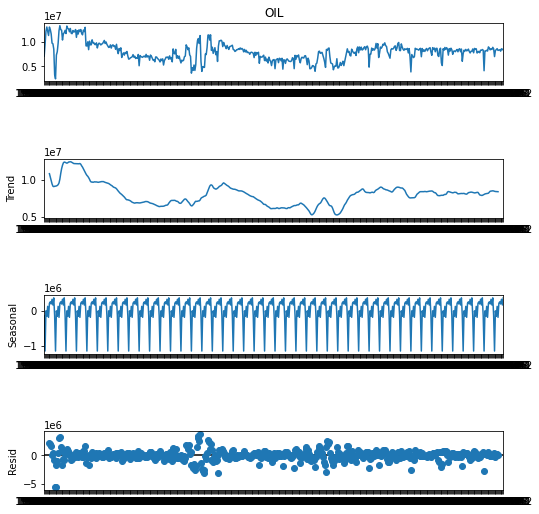

In [37]:
a=seasonal_decompose(df['OIL'],period=12)
a.plot()
a.plot().set_size_inches(8,8)

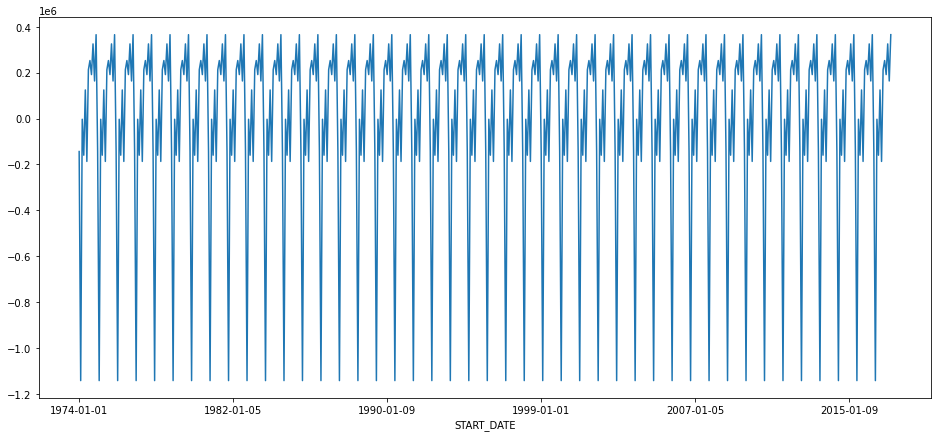

In [38]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [46]:
from pmdarima.arima import auto_arima

In [47]:
auto_arima(df['OIL'],seasonal=True,m=12,max_p=7,max_d=5,max_q=7,max_P=4,max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  528
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -8030.901
Date:                            Mon, 24 May 2021   AIC                          16071.802
Time:                                    03:37:20   BIC                          16093.138
Sample:                                         0   HQIC                         16080.155
                                            - 528                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.067e+04   9412.786     -1.133      0.257   -2.91e+04    7782.989
ma.L1         -0.1517      0.025     -6.141      0.000      -0.200      -0.103
ar.S.L12       0.8952      0.045     20.068      0.000       0.808       0.983
ma.S.L12      -0.7576      0.059    -12.854      0.000      -0.873      -0.642
sigma2      1.064e+12      0.000   7.51e+15      0.000    1.06e+12    1.06e+12
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):              1046.81
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.77e+34. Standard errors may be unstable.
"""

In [48]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [49]:
arima_model = SARIMAX(train_data['OIL'], order = (0,0,2), seasonal_order = (1,0,0,12))
arima_result = arima_model.fit()
arima_result.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 OIL   No. Observations:                  516
Model:             SARIMAX(0, 0, 2)x(1, 0, [], 12)   Log Likelihood               -8697.535
Date:                             Mon, 24 May 2021   AIC                          17403.070
Time:                                     03:38:05   BIC                          17420.054
Sample:                                          0   HQIC                         17409.725
                                             - 516                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7839      0.991      0.791      0.429      -1.158       2.726
ma.L2          0.5281      0.782      0.675      0.500      -1.006       2.062
ar.S.L12       0.7593      0.190      3.995      0.000       0.387       1.132
sigma2      6.591e+13   2.19e-16   3.01e+29      0.000    6.59e+13    6.59e+13
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                62.59
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.15
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+46. Standard errors may be unstable.
"""

In [50]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


516    7.875902e+06
517    3.923426e+06
518    6.238803e+06
519    6.227810e+06
520    6.338293e+06
521    6.213023e+06
522    6.867622e+06
523    6.694462e+06
524    6.407062e+06
525    6.551042e+06
526    6.457459e+06
527    6.799804e+06
Name: ARIMA Predictions, dtype: float64

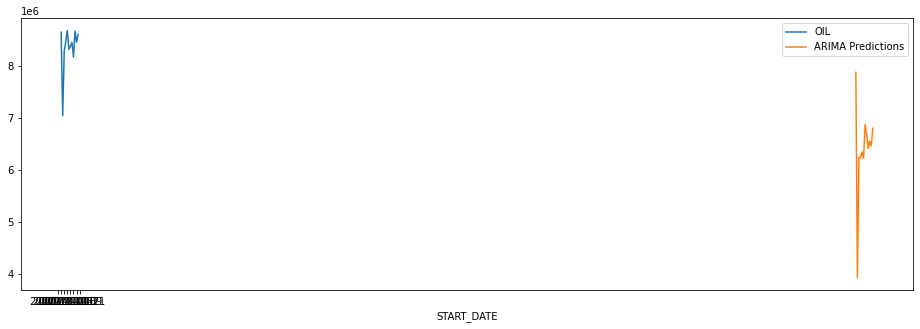

In [51]:
test_data['OIL'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [52]:
arima_rmse_error = rmse(test_data['OIL'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['OIL'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 4136199520838.604
RMSE Error: 2033764.8637044067
Mean: 8045604.176136363


In [53]:
test_data['ARIMA_Predictions'] = arima_pred

<ipython-input-53-c6fe8541f169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred
